#LOAD data CSV

In [1]:
!curl -L "https://public.roboflow.com/ds/AC3gwMp3FC?key=Zwrb2FUj1d" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   898  100   898    0     0   2636      0 --:--:-- --:--:-- --:--:--  2641
100 45.9M  100 45.9M    0     0  58.7M      0 --:--:-- --:--:-- --:--:--  172M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.csv   
 extracting: test/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/img-195_jpg.rf.f77a8f4d432a9a89235168ff8e09a650.jpg  
 extracting: test/img-19

#R-CNN

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
!pip install opencv-python opencv-contrib-python

In [3]:
import pandas as pd

# Load your CSV file
csv_file_path = '/content/train/_annotations.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Group the data by 'filename'
grouped = df.groupby('filename')

destination_folder = '/content/Input/Annotations/'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)


# Iterate through each group and save to a new CSV file
for filename, group in grouped:
    name_without_extension = os.path.splitext(filename)[0]
    output_file_path = f'/content/Input/Annotations/{name_without_extension}.csv'  # Replace with the desired output folder path
    group.to_csv(output_file_path, index=False)


In [4]:
import shutil
import os

# Source and destination folder paths
source_folder = '/content/train'
destination_folder = '/content/Input/Data/Images'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Move files from the source folder to the destination folder
files = os.listdir(source_folder)
for file in files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(destination_folder, file)
    shutil.move(source_path, destination_path)

print(f"Moved {len(files)} files from {source_folder} to {destination_folder}.")


Moved 466 files from /content/train to /content/Input/Data/Images.


In [5]:
os.chdir('/content/Input/')

annot = 'Annotations'
path = 'Data/Images'

In [6]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

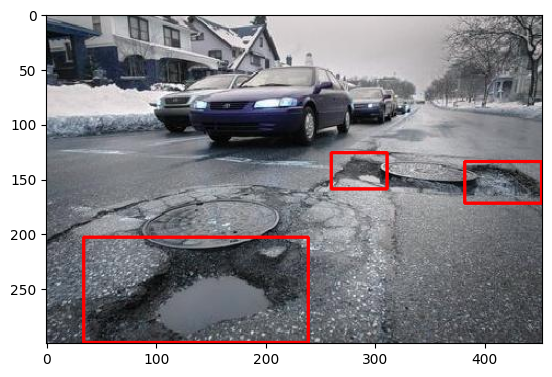

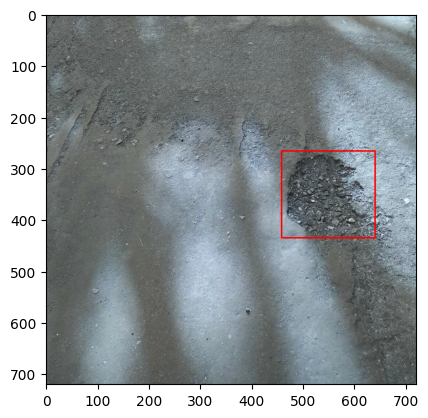

In [7]:
for e,i in enumerate(os.listdir(annot)):
    if e < 2:
        # print(i)
        filename = os.path.splitext(i)[0]
        # print(filename)
        filename = filename+".jpg"
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))

        for row in df.iterrows():
            x1 = int(row[1]["xmin"])
            y1 = int(row[1]["ymin"])
            x2 = int(row[1]["xmax"])
            y2 = int(row[1]["ymax"])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        # break

In [ ]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

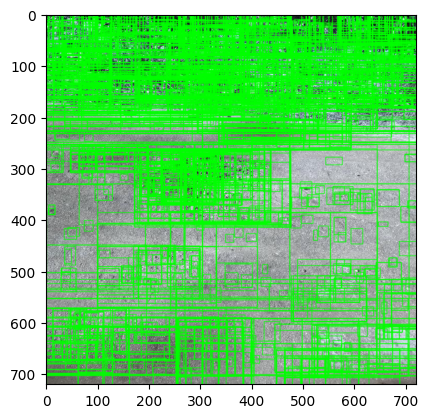

In [ ]:
im = cv2.imread("/content/Input/Data/Images/img-100_jpg.rf.233751cac3399aa80b5e58a2afbb753a.jpg")#os.path.join(path,"airplane_220.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect

    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

plt.imshow(imOut)

In [ ]:
train_images=[]
train_labels=[]

In [ ]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
import cv2
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Assuming you have a function get_iou implemented

# Initialize TensorFlow with GPU support
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
import cv2
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img

z = 0

for e, i in enumerate(os.listdir(annot)):
    try:
        if z <= 500:
            if i.startswith("i"):
                filename = os.path.splitext(i)[0]
                filename = filename + ".jpg"
                img = cv2.imread(os.path.join(path, filename))

                df = pd.read_csv(os.path.join(annot, i))
                gtvalues = []

                for row in df.iterrows():
                    x1 = int(row[1]["xmin"])
                    y1 = int(row[1]["ymin"])
                    x2 = int(row[1]["xmax"])
                    y2 = int(row[1]["ymax"])
                    gtvalues.append({"x1": x1, "x2": x2, "y1": y1, "y2": y2})

                ss.setBaseImage(img)
                ss.switchToSelectiveSearchFast()
                ssresults = ss.process()
                imout = img.copy()
                counter = 0
                falsecounter = 0
                flag = 0
                fflag = 0
                bflag = 0

                for e, result in enumerate(ssresults):
                    if e < 2000 and flag == 0:
                        for gtval in gtvalues:
                            x, y, w, h = result
                            iou = get_iou(gtval, {"x1": x, "x2": x + w, "y1": y, "y2": y + h})

                            if counter < 30:
                                if iou > 0.70:
                                    timage = imout[y:y + h, x:x + w]
                                    resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
                                    train_images.append(resized)
                                    train_labels.append(1)
                                    counter += 1
                            else:
                                fflag = 1

                            if falsecounter < 30:
                                if iou < 0.3:
                                    timage = imout[y:y + h, x:x + w]
                                    resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
                                    train_images.append(resized)
                                    train_labels.append(0)
                                    falsecounter += 1
                            else:
                                bflag = 1

                        if fflag == 1 and bflag == 1:
                            print("inside")
                            flag = 1

                z = z + 1

            else:
                break
    except Exception as e:
        print(e)
        print("error in " + filename)
        continue


inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
for layers in (vggmodel.layers)[:15]:
    #print(layers)
    layers.trainable = False

X= vggmodel.layers[-2].output

predictions = Dense(2, activation="softmax")(X)

model_final = Model(inputs = vggmodel.input, outputs = predictions)


opt = Adam(lr=0.0001)

model_final.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])

model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import numpy as np

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(np.array(train_labels))

del train_labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(train_images),Y,test_size=0.10)

del train_images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X_train, y_train, X_test, and y_test are your original data arrays

# Training Data Generator without Augmentation
traindata_generator = ImageDataGenerator()
traindata = traindata_generator.flow(x=X_train[0:1000], y=y_train[0:1000], shuffle=False)

# Testing Data Generator without Augmentation
testdata_generator = ImageDataGenerator()
testdata = testdata_generator.flow(x=X_test[0:100], y=y_test[0:100], shuffle=False)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("R-CNN.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 5, epochs= 100, validation_data= testdata, validation_steps=2, callbacks=[checkpoint, early])

<ipython-input-22-5a7bcbc98298>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 5, epochs= 100, validation_data= testdata, validation_steps=2, callbacks=[checkpoint, early])


Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 4.1577 - accuracy: 0.6938
Epoch 1: val_loss improved from 0.86172 to 0.53644, saving model to R-CNN.h5
5/5 [==============================] - 84s 21s/step - loss: 4.1577 - accuracy: 0.6938 - val_loss: 0.5364 - val_accuracy: 0.7969
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 1.4532 - accuracy: 0.3812
Epoch 2: val_loss improved from 0.53644 to 0.51832, saving model to R-CNN.h5
5/5 [==============================] - 98s 24s/step - loss: 1.4532 - accuracy: 0.3812 - val_loss: 0.5183 - val_accuracy: 0.7969
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.7875
Epoch 3: val_loss improved from 0.51832 to 0.41730, saving model to R-CNN.h5
5/5 [==============================] - 102s 26s/step - loss: 0.4169 - accuracy: 0.7875 - val_loss: 0.4173 - val_accuracy: 0.7969
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.3927 - accuracy: 0.8250
Epoch 4: val

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
model_path = "/content/Input/R-CNN.h5"  # Update with your model path

# Load your model
model_final = load_model(model_path)


In [ ]:
model_path = "/content/gdrive/MyDrive/AMR_RCNN/R-CNN.h5"


In [ ]:
model_final.save(model_path)


#test

In [ ]:
import pandas as pd

# Load your CSV file
csv_file_path = '/content/test/_annotations.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Group the data by 'filename'
grouped = df.groupby('filename')

destination_folder = '/content/TestInput/Annotations/'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)


# Iterate through each group and save to a new CSV file
for filename, group in grouped:
    name_without_extension = os.path.splitext(filename)[0]
    output_file_path = f'/content/TestInput/Annotations/{name_without_extension}.csv'  # Replace with the desired output folder path
    group.to_csv(output_file_path, index=False)


In [ ]:
import shutil
import os

# Source and destination folder paths
source_folder = '/content/test'
destination_folder = '/content/TestInput/Data/Images'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Move files from the source folder to the destination folder
files = os.listdir(source_folder)
for file in files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(destination_folder, file)
    shutil.move(source_path, destination_path)

print(f"Moved {len(files)} files from {source_folder} to {destination_folder}.")


Moved 68 files from /content/test to /content/TestInput/Data/Images.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
model_path = "/content/gdrive/MyDrive/AMR_RCNN/R-CNN.h5"
model_final = load_model(model_path)

In [ ]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

IoU for Image img-343_jpg.rf.64b8e5ed7aa9153427c52de5812b3ab2.jpg: 0.3650652807706934


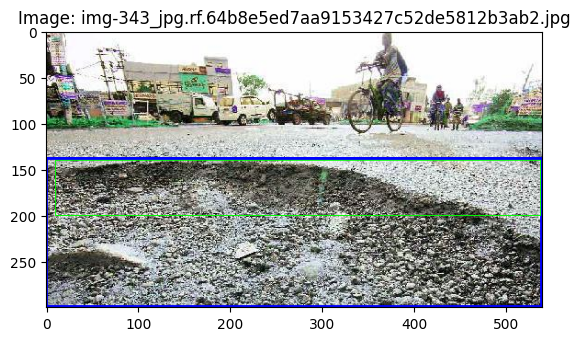

IoU for Image img-501_jpg.rf.d2ea0e0d6091ce43d964d62e7ac02231.jpg: 0.38727995457126635
IoU for Image img-501_jpg.rf.d2ea0e0d6091ce43d964d62e7ac02231.jpg: 0.7173879081393533


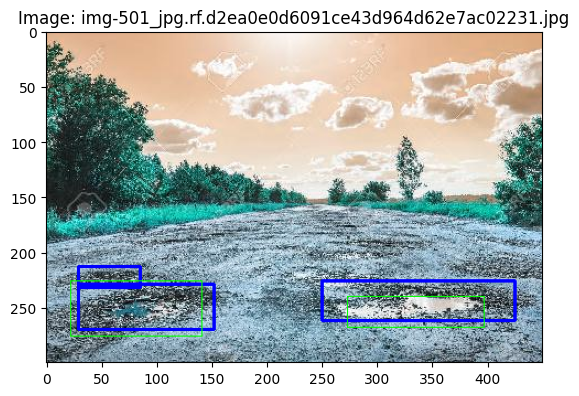

IoU for Image img-282_jpg.rf.a0ac2a228cf0edb961017e538356b5af.jpg: 0.9261877828054299


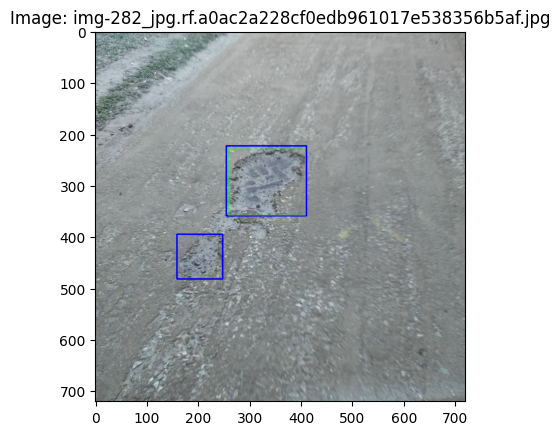

IoU for Image img-486_jpg.rf.7469bae9d18a0cf9dd690fbbcde56298.jpg: 0.5571847507331378
IoU for Image img-486_jpg.rf.7469bae9d18a0cf9dd690fbbcde56298.jpg: 0.8196386946386947
IoU for Image img-486_jpg.rf.7469bae9d18a0cf9dd690fbbcde56298.jpg: 0.5238095238095238


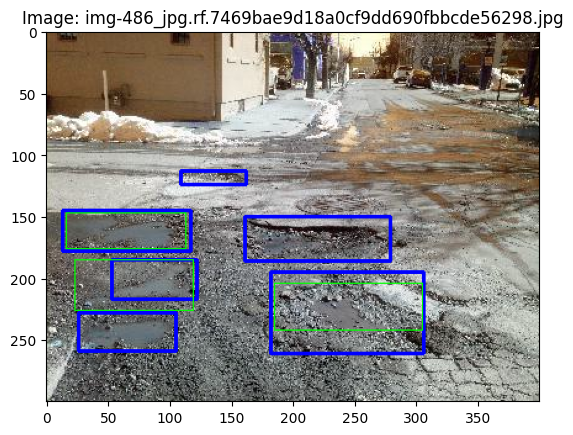

IoU for Image img-42_jpg.rf.532fb8eb05b1efc570c5e4165e614201.jpg: 0.9406216991097027
IoU for Image img-42_jpg.rf.532fb8eb05b1efc570c5e4165e614201.jpg: 0.3469765117441279


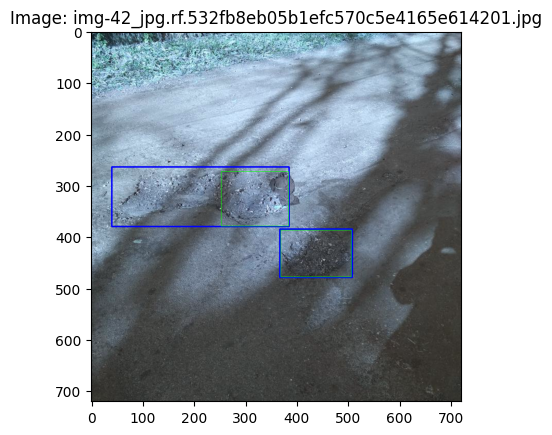

IoU for Image img-350_jpg.rf.643e7315948dd95c0787f6dc5c938ff3.jpg: 0.40659145645835976
IoU for Image img-350_jpg.rf.643e7315948dd95c0787f6dc5c938ff3.jpg: 0.35276967930029157


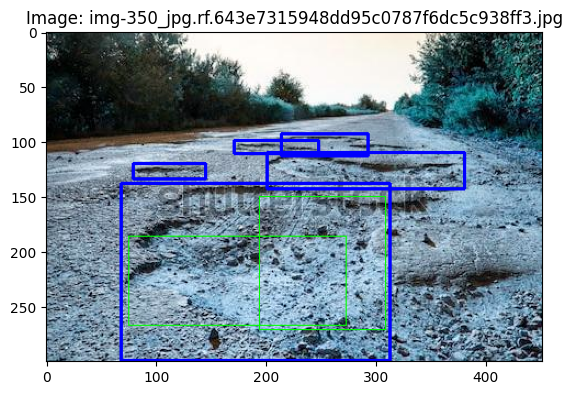

IoU for Image img-440_jpg.rf.4475e2f277c4b84b9d5ae3095916bffa.jpg: 0.35269311865056546


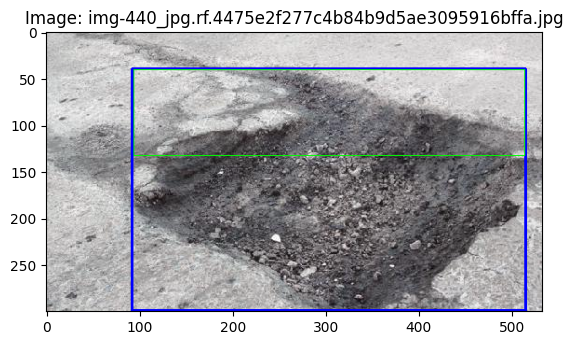

IoU for Image img-269_jpg.rf.f51d9eb8d02a34ac01d4a486cbfbdd4f.jpg: 0.400823257010548


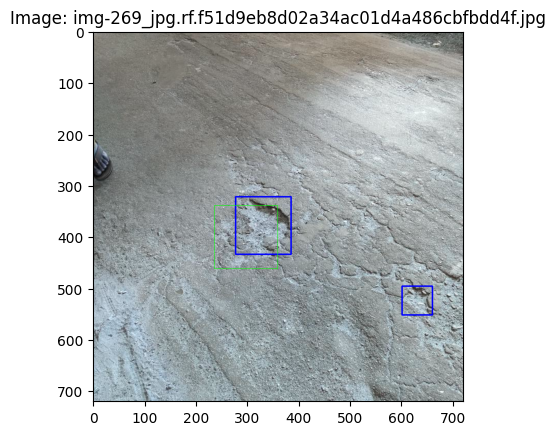

IoU for Image img-410_jpg.rf.5f10f2bbde7900b5348aeaed6116b901.jpg: 0.30468339596718796


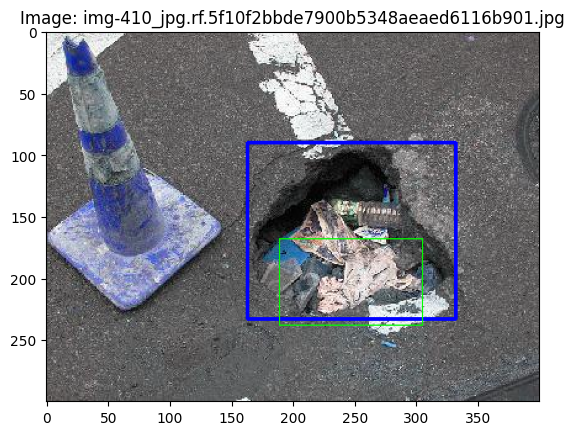

IoU for Image img-364_jpg.rf.e385283baa4507e9b6a79c9e92c4b453.jpg: 0.48574862637362637


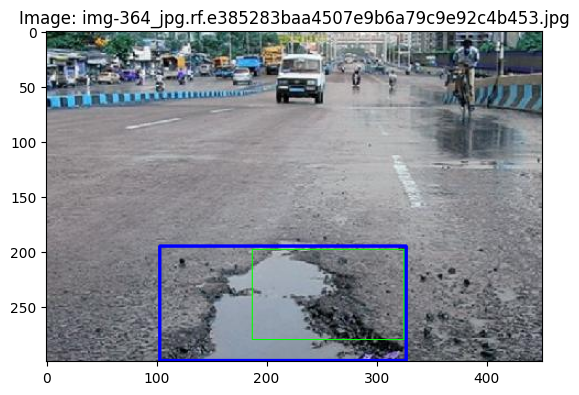

IoU for Image img-245_jpg.rf.1c9b49a366bda1cf64dbfac2a946cd38.jpg: 0.7248783583668289


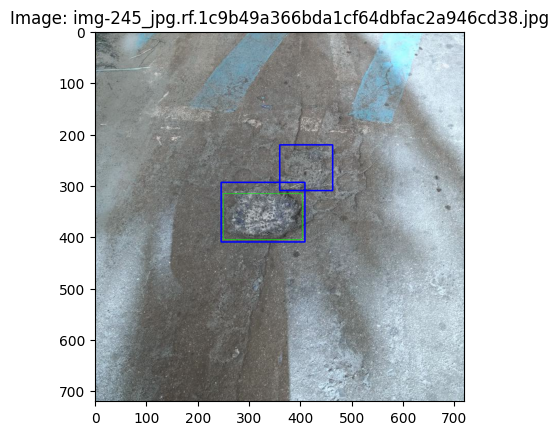

IoU for Image img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 0.43787406005422275


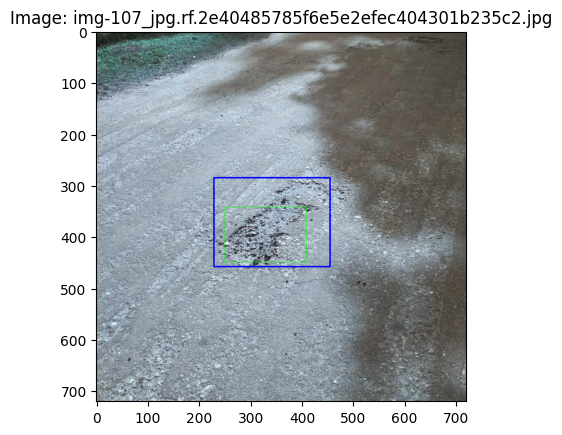

IoU for Image img-449_jpg.rf.a88013566cf72d8e523b8517104983d1.jpg: 0.472771524186188


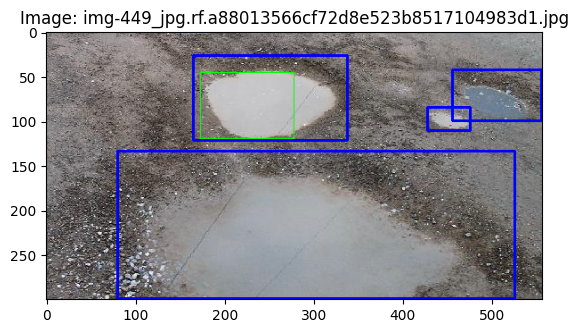

IoU for Image img-415_jpg.rf.2285ec32b9bdc584221e193dc135e3fd.jpg: 0.72659616137877


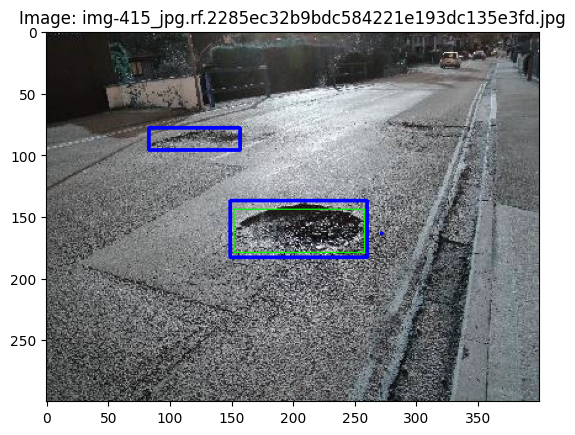

IoU for Image img-452_jpg.rf.005f706e703f7518562fc3ec4df0543f.jpg: 0.46115288220551376


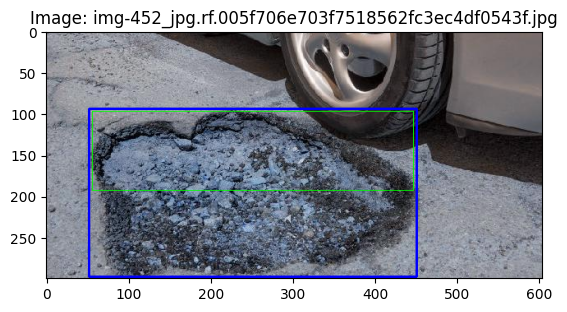

IoU for Image img-196_jpg.rf.c1e105382a0bb8d329959cea45173cdf.jpg: 0.7649558679306963
IoU for Image img-196_jpg.rf.c1e105382a0bb8d329959cea45173cdf.jpg: 0.3739130434782609


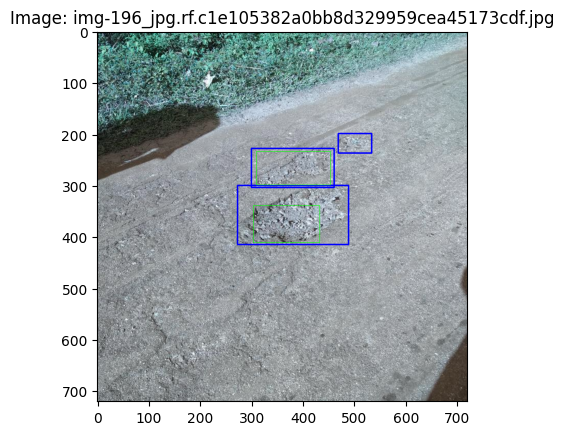

IoU for Image img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg: 0.510461373390558


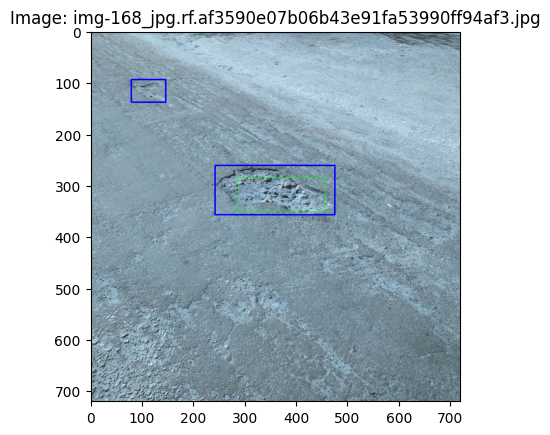

IoU for Image img-394_jpg.rf.2182e193f33ed5bcce45df7df27032f7.jpg: 0.4427103622906116


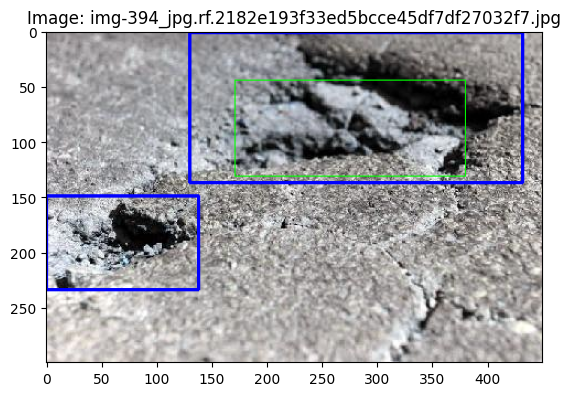

IoU for Image img-43_jpg.rf.a63cf022f8ba7dbadc62c5d274547b79.jpg: 0.41855905152758777
IoU for Image img-43_jpg.rf.a63cf022f8ba7dbadc62c5d274547b79.jpg: 0.5692802177177178


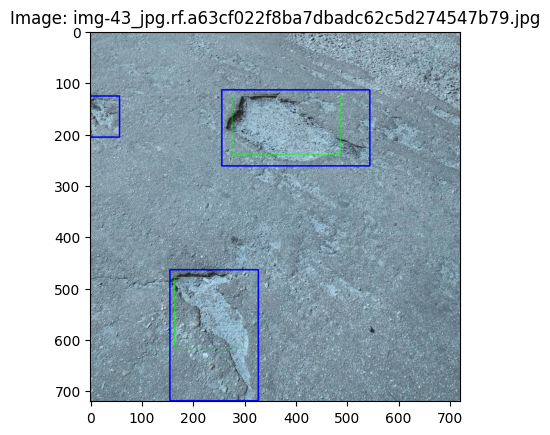

IoU for Image img-337_jpg.rf.aee9516f4db8d93d1fcf7071196974f9.jpg: 0.9501144716230872


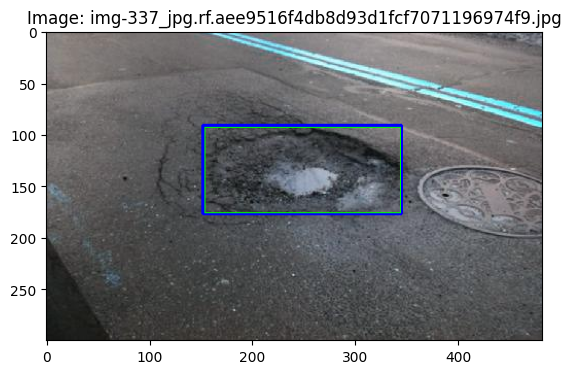

KeyboardInterrupt: ignored

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import contextlib

# Assuming you have ss initialized
annotation_path = "/content/TestInput/Annotations/"  # Update with your annotation path
path = "/content/TestInput/Data/Images"
z = 0

# Initialize variables for evaluation metrics
total_true_positives = 0
total_false_positives = 0
total_false_negatives = 0
total_iou = 0

for e, i in enumerate(os.listdir(path)):
    if (z<20):  # Print only 8 images
        z += 1
        if(i=="_annotations.csv"):
          continue
        img = cv2.imread(os.path.join(path, i))

        # Load ground truth labels
        annotation_file = os.path.join(annotation_path, i.replace('.jpg', '.csv'))
        if os.path.exists(annotation_file):
            df = pd.read_csv(annotation_file)
            for index, row in df.iterrows():
                xmin_gt, ymin_gt, xmax_gt, ymax_gt = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
                cv2.rectangle(img, (xmin_gt, ymin_gt), (xmax_gt, ymax_gt), (0, 0, 255), 2)  # Draw ground truth in red

        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()

        detected_boxes = []  # Store detected bounding boxes

        for e, result in enumerate(ssresults):
            if e < 2000:
                x, y, w, h = result
                timage = imout[y:y+h, x:x+w]
                resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
                img_for_prediction = np.expand_dims(resized, axis=0)

                # Suppress output during prediction
                with open(os.devnull, 'w') as fnull:
                    with contextlib.redirect_stdout(fnull):
                        out = model_final.predict(img_for_prediction)

                if out[0][0] > 0.80:
                    detected_boxes.append((x, y, x+w, y+h))  # Store detected bounding box

        # Merge overlapping bounding boxes
        merged_boxes = cv2.groupRectangles(detected_boxes, 1, 0.2)[0]

        # Draw merged bounding boxes in green for those with IoU > 0.3
        for (x, y, x_plus_w, y_plus_h) in merged_boxes:
            for index, row in df.iterrows():
                xmin_gt, ymin_gt, xmax_gt, ymax_gt = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
                intersection_area = max(0, min(x_plus_w, xmax_gt) - max(x, xmin_gt)) * max(0, min(y_plus_h, ymax_gt) - max(y, ymin_gt))
                union_area = (x_plus_w - x) * (y_plus_h - y) + (xmax_gt - xmin_gt) * (ymax_gt - ymin_gt) - intersection_area
                iou = intersection_area / union_area


                cv2.rectangle(imout, (x, y), (x_plus_w, y_plus_h), (0, 255, 0), 1)

                print(f"IoU for Image {i}: {iou}")

                    # Update metrics based on IoU threshold
                if iou >= 0.3:
                    total_true_positives += 1
                    total_iou += iou
                else:
                    total_false_positives += 1

        # Calculate false negatives
        total_false_negatives = len(df) - total_true_positives


            # Display the image with both ground truth and predicted bounding boxes
        plt.figure()
        plt.imshow(imout)
        plt.title(f"Image: {i}")
        plt.show()

# Calculate overall precision, recall, and average IoU
overall_precision = total_true_positives / (total_true_positives + total_false_positives)
overall_recall = total_true_positives / (total_true_positives + total_false_negatives)
overall_iou = total_iou / total_true_positives
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall IoU: {overall_iou:.2f}")


In [ ]:
overall_precision = total_true_positives / (total_true_positives + total_false_positives)
overall_recall = total_true_positives / (total_true_positives + total_false_negatives)
overall_iou = total_iou / total_true_positives
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall IoU: {overall_iou:.2f}")

Overall Precision: 1.00
Overall Recall: 27.00
Overall IoU: 0.55
